<a href="https://colab.research.google.com/github/Hadiqapieas/Leukemia-Data-classification/blob/PR-and-ROC/PR_and_ROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow scikit-learn matplotlib


In [2]:
!unzip Original.zip

Archive:  Original.zip
   creating: Pro/
  inflating: Pro/WBC-Malignant-Pro-001.jpg  
  inflating: Pro/WBC-Malignant-Pro-002.jpg  
  inflating: Pro/WBC-Malignant-Pro-003.jpg  
  inflating: Pro/WBC-Malignant-Pro-004.jpg  
  inflating: Pro/WBC-Malignant-Pro-005.jpg  
  inflating: Pro/WBC-Malignant-Pro-006.jpg  
  inflating: Pro/WBC-Malignant-Pro-007.jpg  
  inflating: Pro/WBC-Malignant-Pro-008.jpg  
  inflating: Pro/WBC-Malignant-Pro-009.jpg  
  inflating: Pro/WBC-Malignant-Pro-010.jpg  
  inflating: Pro/WBC-Malignant-Pro-011.jpg  
  inflating: Pro/WBC-Malignant-Pro-012.jpg  
  inflating: Pro/WBC-Malignant-Pro-013.jpg  
  inflating: Pro/WBC-Malignant-Pro-014.jpg  
  inflating: Pro/WBC-Malignant-Pro-015.jpg  
  inflating: Pro/WBC-Malignant-Pro-016.jpg  
  inflating: Pro/WBC-Malignant-Pro-017.jpg  
  inflating: Pro/WBC-Malignant-Pro-018.jpg  
  inflating: Pro/WBC-Malignant-Pro-019.jpg  
  inflating: Pro/WBC-Malignant-Pro-020.jpg  
  inflating: Pro/WBC-Malignant-Pro-021.jpg  
  inflating: P

In [4]:
import os
#Organizing Images into Benign and Malignant Folders
# Defining paths to dataset directories
dataset_dir = 'Original'
benign_dir = os.path.join(dataset_dir, 'Benign')
malignant_dir = os.path.join(dataset_dir, 'Malignant')

# Creating the malignant directory if it doesn't exist
if not os.path.exists(malignant_dir):
    os.makedirs(malignant_dir)

# Moving images from early, pre, and pro directories to malignant directory
for stage in ['Early', 'Pre', 'Pro']:
    stage_dir = os.path.join(dataset_dir, stage)
    if os.path.exists(stage_dir):
        for img_file in os.listdir(stage_dir):
            img_path = os.path.join(stage_dir, img_file)
            shutil.move(img_path, malignant_dir)
        os.rmdir(stage_dir)  # Remove the empty directory

In [5]:
import shutil
from sklearn.model_selection import train_test_split

# Define paths to your dataset directories
dataset_dir = '/content'
benign_dir = os.path.join(dataset_dir, 'Benign')
malignant_dir = os.path.join(dataset_dir, 'Malignant')  # Create this directory if it doesn't exist

# Create the malignant directory if it doesn't exist
if not os.path.exists(malignant_dir):
    os.makedirs(malignant_dir)

# Define paths for stages that need to be moved to Malignant
stages = ['Early', 'Pre', 'Pro']

# Move images from early, pre, and pro directories to malignant directory
for stage in stages:
    stage_dir = os.path.join(dataset_dir, stage)
    if os.path.exists(stage_dir):
        for img_file in os.listdir(stage_dir):
            img_path = os.path.join(stage_dir, img_file)
            shutil.move(img_path, malignant_dir)
        os.rmdir(stage_dir)  # Remove the empty directory
    else:
        print(f"Directory {stage_dir} does not exist.")
        # List contents of the 'content' directory
!ls /content
# List files in Benign and Malignant directories
!ls /content/Benign
!ls /Original/Malignant

# Define paths for new dataset splits
train_dir = '/content/train_dataset'
val_dir = '/content/validation_dataset'
test_dir = '/content/test_dataset'

# Create directories for dataset splits
for directory in [train_dir, val_dir, test_dir]:
    os.makedirs(directory, exist_ok=True)
    for category in ['Benign', 'Malignant']:
        os.makedirs(os.path.join(directory, category), exist_ok=True)

# Split dataset and copy images
for category_dir, category in [(benign_dir, 'Benign'), (malignant_dir, 'Malignant')]:
    if os.path.exists(category_dir):  # Ensure directory exists
        image_files = [os.path.join(category_dir, img) for img in os.listdir(category_dir)]
        train_files, test_val_files = train_test_split(image_files, test_size=0.3, random_state=42)
        val_files, test_files = train_test_split(test_val_files, test_size=0.5, random_state=42)

        for file in train_files:
            shutil.copy(file, os.path.join(train_dir, category))
        for file in val_files:
            shutil.copy(file, os.path.join(val_dir, category))
        for file in test_files:
            shutil.copy(file, os.path.join(test_dir, category))
    else:
      print(f"Directory {category_dir} does not exist.")


Benign	Malignant  Original  Original.zip  sample_data
WBC-Benign-001.jpg  WBC-Benign-102.jpg	WBC-Benign-203.jpg  WBC-Benign-304.jpg	WBC-Benign-405.jpg
WBC-Benign-002.jpg  WBC-Benign-103.jpg	WBC-Benign-204.jpg  WBC-Benign-305.jpg	WBC-Benign-406.jpg
WBC-Benign-003.jpg  WBC-Benign-104.jpg	WBC-Benign-205.jpg  WBC-Benign-306.jpg	WBC-Benign-407.jpg
WBC-Benign-004.jpg  WBC-Benign-105.jpg	WBC-Benign-206.jpg  WBC-Benign-307.jpg	WBC-Benign-408.jpg
WBC-Benign-005.jpg  WBC-Benign-106.jpg	WBC-Benign-207.jpg  WBC-Benign-308.jpg	WBC-Benign-409.jpg
WBC-Benign-006.jpg  WBC-Benign-107.jpg	WBC-Benign-208.jpg  WBC-Benign-309.jpg	WBC-Benign-410.jpg
WBC-Benign-007.jpg  WBC-Benign-108.jpg	WBC-Benign-209.jpg  WBC-Benign-310.jpg	WBC-Benign-411.jpg
WBC-Benign-008.jpg  WBC-Benign-109.jpg	WBC-Benign-210.jpg  WBC-Benign-311.jpg	WBC-Benign-412.jpg
WBC-Benign-009.jpg  WBC-Benign-110.jpg	WBC-Benign-211.jpg  WBC-Benign-312.jpg	WBC-Benign-413.jpg
WBC-Benign-010.jpg  WBC-Benign-111.jpg	WBC-Benign-212.jpg  WBC-Benign-313

In [6]:
from tensorflow.keras.applications import (
    Xception, InceptionResNetV2, ResNet50V2, InceptionV3,
    DenseNet121, DenseNet201, ResNet50, VGG16, MobileNetV2
)

# Define a dictionary of models to load them in a loop
models_dict = {
    'Xception': Xception,
    'InceptionResNetV2': InceptionResNetV2,
    'ResNet50V2': ResNet50V2,
    'InceptionV3': InceptionV3,
    'DenseNet121': DenseNet121,
    'DenseNet201': DenseNet201,
    'ResNet50': ResNet50,
    'VGG16': VGG16,
    'MobileNetV2': MobileNetV2
}

# Load models
models = {}
for model_name, model_class in models_dict.items():
    models[model_name] = model_class(weights='imagenet', include_top=False, pooling='avg')


58889256/58889256 [==============================] - 4s 0us/step


9406464/9406464 [==============================] - 1s 0us/step


In [7]:
#preparing data for predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input as inception_resnet_v2_preprocess
from tensorflow.keras.applications.resnet_v2 import preprocess_input as resnet50_v2_preprocess
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_v3_preprocess
from tensorflow.keras.applications.densenet import preprocess_input as densenet_preprocess
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_v2_preprocess

# Preprocess function mapping for each model
preprocess_functions = {
    'Xception': xception_preprocess,
    'InceptionResNetV2': inception_resnet_v2_preprocess,
    'ResNet50V2': resnet50_v2_preprocess,
    'InceptionV3': inception_v3_preprocess,
    'DenseNet121': densenet_preprocess,
    'DenseNet201': densenet_preprocess,
    'ResNet50': resnet50_v2_preprocess,
    'VGG16': vgg16_preprocess,
    'MobileNetV2': mobilenet_v2_preprocess
}

# Function to preprocess images for a given model
def preprocess_image(img_path, preprocess_function, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = preprocess_function(img_array)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Load test images
test_images = []
test_labels = []
test_image_paths = os.listdir('/content/test_dataset/Benign') + os.listdir('/content/test_dataset/Malignant')
for img_path in test_image_paths:
    if 'Benign' in img_path:
        test_labels.append(0)  # Label for Benign
        full_path = os.path.join('/content/test_dataset/Benign', img_path)
    else:
        test_labels.append(1)  # Label for Malignant
        full_path = os.path.join('/content/test_dataset/Malignant', img_path)
    test_images.append(full_path)


In [17]:
from scipy.stats import mode
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, roc_curve, auc, PrecisionRecallDisplay, RocCurveDisplay
import matplotlib.pyplot as plt

# Dictionary to hold class predictions from each model
class_predictions = {model_name: [] for model_name in models.keys()}

# Generate predictions for each model
for model_name, model in models.items():
    preprocess_function = preprocess_functions[model_name]
    for img_path in test_images:
        img = preprocess_image(img_path, preprocess_function)
        preds = model.predict(img)
        class_pred = 1 if preds[0][0] >= 0.5 else 0  # Assuming binary classification with threshold 0.5
        class_predictions[model_name].append(class_pred)

# Convert true labels to numpy array
test_labels = np.array(test_labels)


1/1 [==============================] - 0s 27ms/step


In [21]:
# Initialize a list to store the final predictions after max voting
final_predictions = []
individual_predictions = {model_name: np.array(class_predictions[model_name]) for model_name in models.keys()}
# Perform max voting
for i in range(len(test_images)):
    votes = []
    for model_name in models.keys():
        if len(class_predictions[model_name]) > i:
            votes.append(class_predictions[model_name][i])

    if votes:  # Check if votes is not empty
        majority_vote = max(set(votes), key=votes.count)  # Calculate mode using a different approach
        final_predictions.append(majority_vote)
    else:
        # Handle case where votes is empty (if all predictions are missing or inconsistent)
        # For example, you could append a default value or handle it based on your application logic
        final_predictions.append(0)  # Default to 0 in case of no votes

# Convert final predictions to numpy array
final_predictions = np.array(final_predictions)



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Max Voting Ensemble - Accuracy: 0.1554
Max Voting Ensemble - Precision: 0.0000
Max Voting Ensemble - Recall: 0.0000
Max Voting Ensemble - F1 Score: 0.0000
Max Voting Ensemble - ROC AUC Score: 0.5000


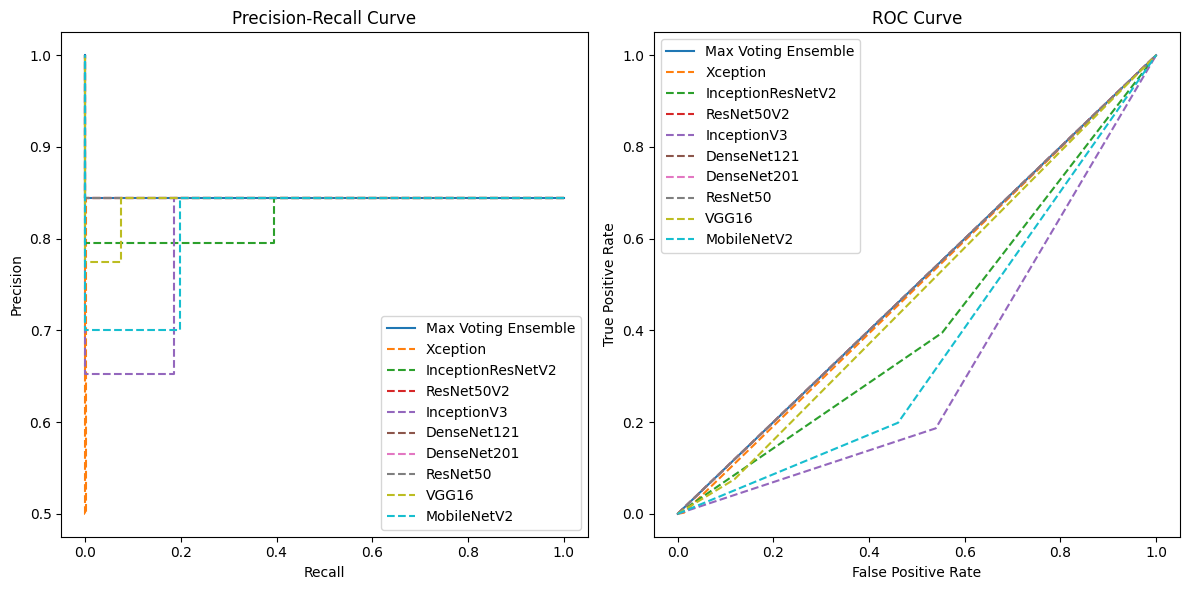

In [22]:
# Evaluate performance for max voting ensemble
accuracy = accuracy_score(test_labels, final_predictions)
precision = precision_score(test_labels, final_predictions)
recall = recall_score(test_labels, final_predictions)
f1 = f1_score(test_labels, final_predictions)
roc_auc = roc_auc_score(test_labels, final_predictions)

print(f"Max Voting Ensemble - Accuracy: {accuracy:.4f}")
print(f"Max Voting Ensemble - Precision: {precision:.4f}")
print(f"Max Voting Ensemble - Recall: {recall:.4f}")
print(f"Max Voting Ensemble - F1 Score: {f1:.4f}")
print(f"Max Voting Ensemble - ROC AUC Score: {roc_auc:.4f}")

# Calculate PR and ROC curves for max voting
precision_vals_maxvoting, recall_vals_maxvoting, _ = precision_recall_curve(test_labels, final_predictions)
fpr_maxvoting, tpr_maxvoting, _ = roc_curve(test_labels, final_predictions)

# Plot PR and ROC curves for max voting
plt.figure(figsize=(12, 6))

# Plot Precision-Recall curve for max voting
plt.subplot(1, 2, 1)
PrecisionRecallDisplay(precision=precision_vals_maxvoting, recall=recall_vals_maxvoting).plot(
    label='Max Voting Ensemble', ax=plt.gca())
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Max Voting Precision-Recall Curve')
plt.legend()

# Plot ROC curve for max voting
plt.subplot(1, 2, 2)
RocCurveDisplay(fpr=fpr_maxvoting, tpr=tpr_maxvoting, roc_auc=auc(fpr_maxvoting, tpr_maxvoting)).plot(
    label='Max Voting Ensemble', ax=plt.gca())
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Max Voting ROC Curve')
plt.legend()

# Calculate and plot PR and ROC curves for each individual model
for model_name, predictions in individual_predictions.items():
    precision_vals, recall_vals, _ = precision_recall_curve(test_labels, predictions)
    fpr, tpr, _ = roc_curve(test_labels, predictions)

    # Plot Precision-Recall curve for individual model
    plt.subplot(1, 2, 1)
    PrecisionRecallDisplay(precision=precision_vals, recall=recall_vals).plot(
        label=model_name, ax=plt.gca(), linestyle='--')

    # Plot ROC curve for individual model
    plt.subplot(1, 2, 2)
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, tpr)).plot(
        label=model_name, ax=plt.gca(), linestyle='--')

# Finalize plots and display
plt.subplot(1, 2, 1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.tight_layout()
plt.show()